In [83]:
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import SingleGrid
from mesa.datacollection import DataCollector
import random
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
def addition(x, y):
    return x + y

addition(5, 4)

9

In [3]:
class Person:
    def __init__(self, name):
        self.name = name
    
    def say_hi(self):
        print("Hello, my name is ", self.name)

In [5]:
p1 = Person("Charles")
p1.say_hi()

Hello, my name is  Charles


In [60]:
class SchellingAgent(Agent):
    def __init__(self, pos, model, agent_type):
        super().__init__(pos, model)
        self.pos = pos
        self.type = agent_type

    def step(self):
        similar = 0
        neighbors = self.model.grid.neighbor_iter(self.pos)

        for neighbor in neighbors:
            if neighbor.type == self.type:
                similar += 1

        if similar < self.model.homophily:
            self.model.grid.move_to_empty(self)
        else:
            self.model.happy += 1

class SchellingModel(Model):
    def __init__(self, height, width, density, minority_pc, homophily):
        self.height = height
        self.width = width
        self.density = density
        self.minority_pc = minority_pc
        self.homophily = homophily
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(width, height, torus = True)
        self.happy = 0
        self.datacollector = DataCollector({"happy": lambda m: m.happy})
        self.running = True

        for cell in self.grid.coord_iter():
            x = cell[1]
            y = cell[2]
            if random.random() < self.density:
                if random.random() < self.minority_pc:
                    agent_type = 1
                else:
                    agent_type = 0

                agent = SchellingAgent((x, y), self, agent_type)
                self.grid.position_agent(agent, (x, y))
                self.schedule.add(agent)
    
    def step(self):
        self.happy = 0
        self.schedule.step()
        self.datacollector.collect(self)
        if self.happy == self.schedule.get_agent_count():
            self.running = False

In [73]:
model = SchellingModel(10, 10, 0.6, 0.4, 3)

In [74]:
while model.running and model.schedule.steps < 100:
    model.step()

/home/joe/Documents/schoolwork/soda502/soda502/lib/python3.9/site-packages/mesa/space.py:204: UserWarning: `neighbor_iter` is deprecated in favor of `iter_neighbors` and will be removed in the subsequent version.
  warn(


In [75]:
print(model.schedule.steps)
model_out = model.datacollector.get_model_vars_dataframe()

26


<AxesSubplot:>

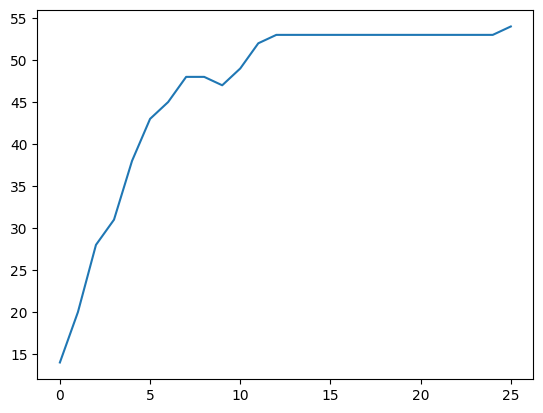

In [76]:
model_out.happy.plot()

In [77]:
def get_segregation(model):
    segregated_agent = 0
    
    for agent in model.schedule.agents:

        segregated_agents = 0

        for agent in model.schedule.agents:
            segregated = True

            for neighbor in model.grid.neighbor_iter(agent.pos):
                if neighbor.type != agent.type:
                    segregated = False
                    break
            
            if segregated:
                segregated_agents += 1
        
    return segregated_agents / model.schedule.get_agent_count()

In [78]:
get_segregation(model)

/home/joe/Documents/schoolwork/soda502/soda502/lib/python3.9/site-packages/mesa/space.py:204: UserWarning: `neighbor_iter` is deprecated in favor of `iter_neighbors` and will be removed in the subsequent version.
  warn(


0.5740740740740741

In [81]:
data = []
for density in range(1, 10):
    
    density = density / 10
    model = SchellingModel(10, 10, density, 0.4, 3)

    while model.running and model.schedule.steps < 100:
        model.step()

    iterations = model.schedule.steps
    data.append([density, iterations])

/home/joe/Documents/schoolwork/soda502/soda502/lib/python3.9/site-packages/mesa/space.py:204: UserWarning: `neighbor_iter` is deprecated in favor of `iter_neighbors` and will be removed in the subsequent version.
  warn(


In [86]:
data_seg = []

for minority_pc in range(1, 50):
    minority_pc = minority_pc / 100

    model = SchellingModel(10, 10, 0.6, minority_pc, 3)

    while model.running and model.schedule.steps < 100:
        model.step()

    segregation = get_segregation(model)
    data_seg.append([segregation, minority_pc])

/home/joe/Documents/schoolwork/soda502/soda502/lib/python3.9/site-packages/mesa/space.py:204: UserWarning: `neighbor_iter` is deprecated in favor of `iter_neighbors` and will be removed in the subsequent version.
  warn(


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

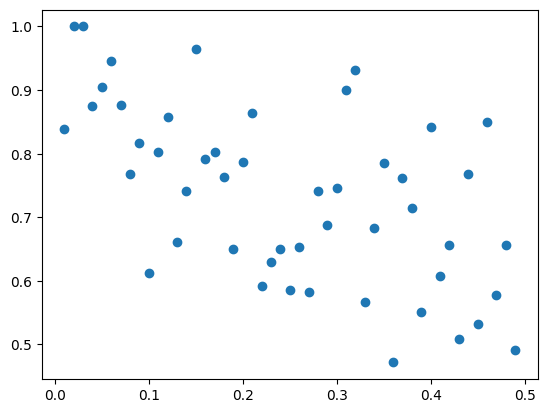

In [87]:
df = pd.DataFrame(data_seg, columns = ["segregation", "minority_pc"])
plt.scatter(df.minority_pc, df.segregation)
plt.grid

In [92]:
data_size = []
for grid_size in range(10, 100):
    print(grid_size)
    model = SchellingModel(grid_size, grid_size, 0.6, 0.4, 3)

    while model.running and model.schedule.steps < 100:
        model.step()
    
    segregation = get_segregation(model)
    data_size.append([segregation, grid_size])

10
11
12
13


/home/joe/Documents/schoolwork/soda502/soda502/lib/python3.9/site-packages/mesa/space.py:204: UserWarning: `neighbor_iter` is deprecated in favor of `iter_neighbors` and will be removed in the subsequent version.
  warn(


14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


KeyboardInterrupt: 

In [ ]:
df_size = pd.DataFrame(data_size, columns = ["segregation", "grid_size"])
plt.scatter(df_size.grid_size, df_size.segregation)
plt.grid(True)